
# Télécom Paris - Kit Data Science - Session 2

Présentation de l'écosystème Python pour la Data Science.

# 1. NumPy, les origines de la data en Python

- **NumPy** est le premier package de traitement de données en Python
- Il est basé sur un ensemble de fonctions codées en langage C
- Il combine une classe, `ndarray`, et des fonctions universelles
- Il est le socle de la plupart des packages de data science

Numpy utilise des array
- un array à une dimension est un vecteur
- un array à deux dimensions est une matrice
- un array est l'équivalent d'un tenseur

On utilise les arrays pour travailler sur des données non structurées :
- une image est représentée par un array à 3 dimensions
- une vidéo est représenté par un array à 4 dimensions
- etc.

In [1]:
# import
import numpy as np

# 1.1 NumPy et les arrays

### Un peu de vocabulaire

- Les dimensions sont appelées `axis` (`axis=0` : lignes, `axis=1` : colonnes, ...)
- Le nombre de dimensions est accédé avec `.ndim`
- La forme est accédé avec `.shape`
- La taille (`.size`) est le nombre total d’éléments d’un array
- Le type des éléments est accédé avec `.dtype`

On peut générer des arrays de différentes manières :

fonction (extrait)|usage
-|-
array|à partir d'un objet de type tableau
arange|vecteur de nombres également répartis dans un intervalle (pas)
linspace|vecteur de nombres également répartis dans un intervalle (nombre)
zeros|retourne un *ndarray* nul
zeros_like|retourne un *ndarray* nul aux dimensions identiques d'un autre *ndarray*
ones|retourne un *ndarray* unité
ones_like|retourne un *ndarray* unité aux dimensions identiques d'un autre *ndarray*
eye|retourne une matrice nulle avec des 1 sur la première diagonale
identity|retourne une matrice identité
full|retourne une matrice avec une valeur uniforme

**Création explicite**

In [2]:
# un array
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr1)

[[1 2 3]
 [4 5 6]]


In [3]:
# un array
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr1.ndim, arr1.shape, arr1.size, arr1.dtype)

2 (2, 3) 6 int32


**Fonction arange**

In [4]:
# arange
array = np.arange(48, dtype=float)
array

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47.])

In [5]:
# ndim
array.ndim

1

In [6]:
# shape
array.shape

(48,)

La méthode `reshape` permet de modifier la structure d'un array sans changer le nombre d'éléments.

Les méthodes, dîtes de *reshaping*, sont très importantes en Data Science, on en verra avec la librairie **pandas**.

In [7]:
# reshape
array.reshape(8, 6)

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35.],
       [36., 37., 38., 39., 40., 41.],
       [42., 43., 44., 45., 46., 47.]])

**Fonction linspace**

La fonction `np.linspace` est utile par exemple pour tracer des fonctions. Elle génère un nombre donné de valeurs équidistantes entre deux bornes.

In [8]:
# linspace : 11 valeurs entre 0 et 5 inclus
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

## 1.2 Accès et modification de valeurs

In [9]:
array = array.reshape(8, 6)
array

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35.],
       [36., 37., 38., 39., 40., 41.],
       [42., 43., 44., 45., 46., 47.]])

In [10]:
# accès à la première ligne
array[0]

array([0., 1., 2., 3., 4., 5.])

In [11]:
# accès à la première colonne
array[:, 0]

array([ 0.,  6., 12., 18., 24., 30., 36., 42.])

In [12]:
# accès à une sous-matrice
array[2:5, 2:4]

array([[14., 15.],
       [20., 21.],
       [26., 27.]])

In [13]:
# modification d'une sous-matrice
array[2:5, 2:4] = -1
array

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., -1., -1., 16., 17.],
       [18., 19., -1., -1., 22., 23.],
       [24., 25., -1., -1., 28., 29.],
       [30., 31., 32., 33., 34., 35.],
       [36., 37., 38., 39., 40., 41.],
       [42., 43., 44., 45., 46., 47.]])

## 1.3 Le broadcasting

Un array supporte des opérations arithmétiques avec un scalaire et des opérations avec un autre array.

Les opérations arithmétiques de bases se font terme à terme : `*`, `+`, `-`, `/`, `**` (puissance), `%` (modulo).

Pour les opérations avec un autre array, **NumPy** utilise celui dans une dimension compatible avec l'opération.

In [14]:
# vecteur 1
array1 = np.arange(4)
array1

array([0, 1, 2, 3])

In [15]:
# addition avec un scalaire
array2 = array1 + 10
array2

array([10, 11, 12, 13])

In [16]:
# multiplication avec un vecteur
array1 * array2

array([ 0, 11, 24, 39])

In [17]:
# matrice 2 x 4
array3 = np.arange(8).reshape(2, 4)
array3

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [18]:
# addition matrice + vecteur (broadcast)
array3 + array2

array([[10, 12, 14, 16],
       [14, 16, 18, 20]])

#### Python vs NumPy

In [19]:
%%time
# listes Python
len([i ** 2 for i in range(10_000_000)])

Wall time: 4.07 s


10000000

In [20]:
%%time
# ndarray numpy
len(np.arange(10_000_000, dtype=int) ** 2)

Wall time: 70 ms


10000000

In [21]:
4070/70

58.142857142857146

## 1.4 Les fonctions universelles

**NumPy** possède de nombreuses fonctions sur les arrays permettant de les manipuler
- fonctions logiques : `np.all()`, `np.any()`, `np.where(condition, A, B)` permet de faire une condition de manière simple
- fonctions mathématiques : `np.abs()`, `np.sqrt()`, `np.sin()`, `np.cos()`, `np.tan()`, `np.log()`, `np.exp()`, `np.floor()`
- fonctions arithmétiques : `np.sum()`, `np.cumsum()`, `np.min()`, `np.max()`, `np.sort()`, `np.argsort()`
- fonctions statistiques : `np.mean()`, `np.std()`, `np.var()`, `np.median()`, `np.percentile()`, `np.average()`, `np.quantile()`
- calculs matriciels : `@` ou `.dot()`, `.T` ou `.transpose()`

Certaines de ces fonctions peuvent s'utiliser avec le mot-clé `axis` pour préciser dans quelle dimension effectuer la réduction.

In [22]:
np.where?

In [23]:
# array
array

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., -1., -1., 16., 17.],
       [18., 19., -1., -1., 22., 23.],
       [24., 25., -1., -1., 28., 29.],
       [30., 31., 32., 33., 34., 35.],
       [36., 37., 38., 39., 40., 41.],
       [42., 43., 44., 45., 46., 47.]])

In [24]:
# somme des lignes
array.sum(axis=0)

array([168., 176., 121., 126., 200., 208.])

In [25]:
# somme des colonnes
array.sum(axis=1)

array([ 15.,  51.,  56.,  80., 104., 195., 231., 267.])

In [26]:
# produit scalaire
array1@array2  # ou np.dot(array1, array2)

74

In [27]:
array1

array([0, 1, 2, 3])

In [28]:
array2

array([10, 11, 12, 13])

## 1.5 Exemples avec une image

Si l'on charge une image avec le module **pyplot** de la librairie **matplotlib**, on obtient un array sur lequel on peut effectuer des manipulations.

In [29]:
# import
import matplotlib.pyplot as plt

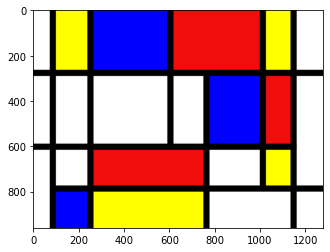

In [30]:
# mondrian
image = plt.imread("mondrian-1504681_1280.png")
plt.imshow(image);

Le type est un `ndarray`.

In [31]:
# type
type(image)

numpy.ndarray

Il y a 3 dimensions.

In [33]:
image.ndim

3

In [32]:
image.shape

(960, 1280, 3)

Les 3 dimensions représentent :
- la hauteur de l'image en pixels, ici 960
- lalargeur de l'image en pixels, ici 1280
- les 3 couleurs primaires : rouge, vert, bleu (RVB) :
    - `image_paris[:,:,0]` représente les valeurs de la couleur primaire <span style="color:red">rouge</span>,
    - `image_paris[:,:,1]` représente les valeurs de la couleur primaire <span style="color:green">verte</span>,
    - `image_paris[:,:,2]` représente les valeurs de la couleur primaire <span style="color:blue">bleue</span>.

Pour les images, les valeurs sont soit des nombres flottants entre 0.0 et 1.0, soit des entiers entre 0 et 255 (correspondant à 00 et FF en hexadécimal). N.B. : 0.0/0 correspond à l'absence de couleur, 1.0/255 correspond à la valeur maximale.

Pour afficher une image avec les valeurs de chaque couleur primaire d'une image, il suffit de passer à 0 les valeurs des 2 autres couleurs complémentaires.

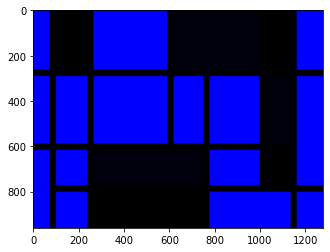

In [34]:
# bleu
newimage = image.copy()
newimage[:,:,(0,1)] = 0
plt.imshow(newimage);

Niveau de gris en utilisant une moyenne uniforme.

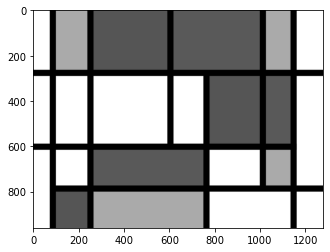

In [35]:
# en niveaux de gris
newimage = image.copy()
grayscale = newimage[:,:,:].mean(axis=2)
newimage[:,:,0] = newimage[:,:,1] = newimage[:,:,2] = grayscale
plt.imshow(newimage);

Niveau de gris en utilisant une moyenne pondérée : $Y=0.2989 \times R + 0.5870 \times G + 0.1140 \times B$

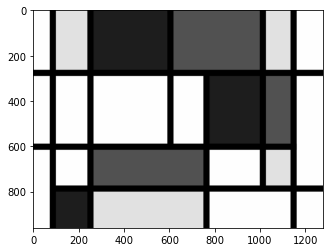

In [36]:
# vraie méthode
grayscale = np.dot(image, [0.2989, 0.5870, 0.1140])
newimage = image.copy()
newimage[:,:,0] = newimage[:,:,1] = newimage[:,:,2] = grayscale
plt.imshow(newimage);

Autre utilisation de **NumPy** : les tenseurs en *Machine Learning* et en *Deep Learning*.

# 2. pandas, la librairie pour la manipulation et l'analyse de données

In [37]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

## 2.1 Chargement des données

Voici les principales fonctions de chargement disponibles :

fonction|usage
-|-
read_clipboard|à partir d'une copie mémoire
read_csv|à partir d'un fichier *CSV* (Comma-Separated Value)
read_excel|à partir d'un fichier *Excel*
read_html|à partir d'un fichier *HTML* (recherche des *< table >*)
read_json|à partir d'un fichier *JSON*
read_sql|à partir d'une requête *SQL*
read_sas|à partir d'un fichier *SAS*
read_table|à partir d'un fichier tabulaire quelconque

In [ ]:
# utilisation de Tab
pd.read_

In [40]:
# aide en ligne
pd.read_csv?

In [191]:
# chargement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11))
geo

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
0,31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852..."
1,11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996..."
2,43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674..."
3,78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610..."
4,84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176..."
5,80462,80150,LAMOTTE-BULEUX,SOMME,PICARDIE,Commune simple,59.0,613.0,0.4,"50.1865666179, 1.83564836965","{""type"": ""Polygon"", ""coordinates"": [[[1.849459..."
6,40200,40410,MOUSTEY,LANDES,AQUITAINE,Commune simple,49.0,6736.0,0.7,"44.3882918763, -0.750880080586","{""type"": ""Polygon"", ""coordinates"": [[[-0.71016..."
7,17394,17700,SAINT-SATURNIN-DU-BOIS,CHARENTE-MARITIME,POITOU-CHARENTES,Commune simple,45.0,2528.0,0.9,"46.1401428747, -0.665133364912","{""type"": ""Polygon"", ""coordinates"": [[[-0.66124..."
...,...,...,...,...,...,...,...,...,...,...,...
36734,15024,15700,BRAGEAC,CANTAL,AUVERGNE,Commune simple,555.0,1222.0,0.1,"45.2038604898, 2.26559675808","{""type"": ""Polygon"", ""coordinates"": [[[2.302124..."


In [41]:
# type ou classe
type(geo)

pandas.core.frame.DataFrame

In [42]:
# dimensions
geo.shape

(36742, 11)

In [43]:
geo.values

array([['31080', '31350', 'BOULOGNE-SUR-GESSE', ..., 1.6,
        '43.2904403081, 0.650641474176',
        '{"type": "Polygon", "coordinates": [[[0.671852008023359, 43.268343740258835], [0.658909106290094, 43.26408629331833], [0.650936412043327, 43.26784594351563], [0.631954762438815, 43.267341506214635], [0.614599943106533, 43.27783114666891], [0.615325237745429, 43.28054704401019], [0.618933377058037, 43.290418241139854], [0.632703603053863, 43.29290769140922], [0.635725394813344, 43.29913861652718], [0.606810974957096, 43.31088599158548], [0.611653374530417, 43.315673021192005], [0.64425277303335, 43.312392395723855], [0.656250024142831, 43.317414027217886], [0.686254891306201, 43.30042113215234], [0.679800800221225, 43.285046628685656], [0.690880497530084, 43.27968634836884], [0.671852008023359, 43.268343740258835]]]}'],
       ['11143', '11510', 'FEUILLA', ..., 0.1,
        '42.9291375888, 2.90138923544',
        '{"type": "Polygon", "coordinates": [[[2.906996888482618, 42.8956790

## 2.2 Series

In [44]:
# on obtient un objet Series à partir d'une colonne du DataFrame
s = geo["Commune"]
s

0                BOULOGNE-SUR-GESSE
1                           FEUILLA
2                        BESSAMOREL
3                PRUNAY-EN-YVELINES
4              MORIERES-LES-AVIGNON
5                    LAMOTTE-BULEUX
6                           MOUSTEY
7            SAINT-SATURNIN-DU-BOIS
                    ...            
36734                       BRAGEAC
36735                       ANCOURT
36736                     BUSSIARES
36737                     CHAVANNAZ
36738    NEEWILLER-PRES-LAUTERBOURG
36739       LACHAPELLE-SOUS-AUBENAS
36740                BAGE-LE-CHATEL
36741                  GUILBERVILLE
Name: Commune, Length: 36742, dtype: object

In [45]:
# type de l'objet
type(s)

pandas.core.series.Series

In [46]:
# accès à la variable d'instance "name" = nom de la colonne
s.name

'Commune'

In [47]:
# accès à la variable d'instance "values"
s.values

array(['BOULOGNE-SUR-GESSE', 'FEUILLA', 'BESSAMOREL', ...,
       'LACHAPELLE-SOUS-AUBENAS', 'BAGE-LE-CHATEL', 'GUILBERVILLE'],
      dtype=object)

In [48]:
# type de la variable "values"
type(s.values)

numpy.ndarray

In [49]:
# dimension de l'objet, retourne un tuple avec un seul élément
s.shape

(36742,)

In [50]:
# taille de l'objet, ou bien len(s)
s.size

36742

In [51]:
# index numérique par défaut
s.index

RangeIndex(start=0, stop=36742, step=1)

In [52]:
# dtype de la série
s.dtype

dtype('O')

In [53]:
object

object

In [54]:
# tête
s.head()

0      BOULOGNE-SUR-GESSE
1                 FEUILLA
2              BESSAMOREL
3      PRUNAY-EN-YVELINES
4    MORIERES-LES-AVIGNON
Name: Commune, dtype: object

In [55]:
# queue
s.tail()

36737                     CHAVANNAZ
36738    NEEWILLER-PRES-LAUTERBOURG
36739       LACHAPELLE-SOUS-AUBENAS
36740                BAGE-LE-CHATEL
36741                  GUILBERVILLE
Name: Commune, dtype: object

Nombre de valeurs uniques d'un objet *Series*

In [56]:
# nombre de valeurs uniques
s.nunique()

34130

In [57]:
# nombre de départements
geo["Département"].nunique()

101

In [58]:
# nombre de statuts de commune
geo["Statut"].nunique()

6

In [59]:
# liste des départements
geo["Département"].unique()

array(['HAUTE-GARONNE', 'AUDE', 'HAUTE-LOIRE', 'YVELINES', 'VAUCLUSE',
       'SOMME', 'LANDES', 'CHARENTE-MARITIME', 'ORNE', 'NORD',
       'ALPES-DE-HAUTE-PROVENCE', 'AISNE', 'CHER', 'CALVADOS', 'ARDECHE',
       'MOSELLE', 'SARTHE', 'DEUX-SEVRES', 'HAUTES-ALPES', 'FINISTERE',
       'SAVOIE', "COTES-D'ARMOR", "COTE-D'OR", 'HAUTE-MARNE', 'VIENNE',
       'PYRENEES-ATLANTIQUES', 'DROME', 'OISE', 'CHARENTE',
       'EURE-ET-LOIR', 'MARNE', 'MAYENNE', 'GIRONDE', 'DOUBS',
       'PAS-DE-CALAIS', 'LOIRE', 'VENDEE', 'HAUTE-SAVOIE', 'HAUTE-CORSE',
       'VOSGES', 'MEUSE', 'ESSONNE', 'JURA', 'EURE',
       'PYRENEES-ORIENTALES', 'MORBIHAN', 'LOT', 'SEINE-ET-MARNE', 'GARD',
       'HAUTE-SAONE', 'HAUTE-VIENNE', 'SAONE-ET-LOIRE', 'ARDENNES',
       'HERAULT', 'ILLE-ET-VILAINE', 'SEINE-MARITIME', 'MANCHE',
       'BAS-RHIN', 'HAUTES-PYRENEES', 'AIN', 'LOIRET', 'CORREZE',
       'INDRE-ET-LOIRE', 'INDRE', 'ARIEGE', "VAL-D'OISE",
       'MEURTHE-ET-MOSELLE', 'RHONE', 'LOIRE-ATLANTIQUE',
       '

**Exercice 1**
- Combien de valeurs différentes comporte la colonne "Altitude Moyenne" ?
- Pour quelle altitude inférieure à 1000 mètres n'y a-t-il aucune commune ?

In [63]:
geo["Altitude Moyenne"].nunique()

1652

In [62]:
geo["Altitude Moyenne"].unique()

array([ 301.,  314.,  888., ..., 1342., 1708., 2016.])

In [68]:
set.difference?

In [67]:
set(range(1000)).difference(geo["Altitude Moyenne"].unique())

{876}

In [ ]:
# algo vs set

In [69]:
# nombre de communes par département
geo["Département"].value_counts()

PAS-DE-CALAIS        895
AISNE                816
SOMME                782
SEINE-MARITIME       744
MOSELLE              730
CALVADOS             706
COTE-D'OR            706
OISE                 693
                    ... 
SEINE-SAINT-DENIS     40
HAUTS-DE-SEINE        36
MARTINIQUE            34
GUADELOUPE            32
REUNION               24
GUYANE                22
PARIS                 20
MAYOTTE               17
Name: Département, Length: 101, dtype: int64

In [70]:
s2 = geo["Département"].value_counts()
type(s2)

pandas.core.series.Series

In [71]:
# l'index est composé des valeurs uniques de l'objet Series initial
s2.index

Index(['PAS-DE-CALAIS', 'AISNE', 'SOMME', 'SEINE-MARITIME', 'MOSELLE',
       'CALVADOS', 'COTE-D'OR', 'OISE', 'EURE', 'NORD',
       ...
       'TERRITOIRE DE BELFORT', 'VAL-DE-MARNE', 'SEINE-SAINT-DENIS',
       'HAUTS-DE-SEINE', 'MARTINIQUE', 'GUADELOUPE', 'REUNION', 'GUYANE',
       'PARIS', 'MAYOTTE'],
      dtype='object', length=101)

In [72]:
s2.index.is_unique

True

In [73]:
# les valeurs sont les nombres d'occurences des valeurs uniques de l'objet Series initial
s2.values

array([895, 816, 782, 744, 730, 706, 706, 693, 675, 650, 620, 601, 594,
       594, 589, 573, 557, 547, 545, 544, 542, 533, 527, 515, 514, 505,
       500, 474, 472, 470, 463, 463, 455, 438, 438, 433, 419, 404, 402,
       377, 375, 373, 369, 363, 353, 353, 343, 340, 339, 334, 332, 331,
       327, 323, 320, 319, 312, 305, 305, 304, 301, 294, 291, 290, 286,
       283, 282, 281, 277, 262, 261, 261, 260, 260, 260, 247, 236, 226,
       221, 201, 200, 196, 195, 185, 185, 177, 163, 153, 151, 134, 124,
       102,  47,  40,  36,  34,  32,  24,  22,  20,  17], dtype=int64)

**Exercice 2**

- Donner le décompte des différents statuts des communes.
- Quels sont les 10 noms de communes les plus fréquents ?
- En français, le nom de famille le plus fréquent est *Martin*, mais quel est le nom de commune le plus fréquent ?

In [75]:
geo["Statut"].value_counts()

Commune simple          33421
Chef-lieu canton         2980
Sous-préfecture           240
Préfecture                 74
Préfecture de région       26
Capitale d'état             1
Name: Statut, dtype: int64

In [78]:
geo["Commune"].value_counts().head(10)

SAINTE-COLOMBE    14
SAINT-SAUVEUR     12
BEAULIEU          11
SAINTE-MARIE      11
SAINT-SULPICE     10
SAINT-AUBIN       10
SAINT-LOUP        10
LE PIN            10
SAINT-REMY        10
SAINT-MEDARD       9
Name: Commune, dtype: int64

In [84]:
# method chaining
(geo["Commune"]
 .value_counts()
 .index[0]
)

'SAINTE-COLOMBE'

In [85]:
# population précision limitée
geo["Population"].sum()

64500.00000000001

In [86]:
# min
geo['Altitude Moyenne'].min()

0.0

In [87]:
# index du min
geo['Altitude Moyenne'].idxmin()

25402

In [88]:
# max
geo['Altitude Moyenne'].max()

2713.0

In [89]:
# index du max
geo['Altitude Moyenne'].idxmax()

6414

In [90]:
# opération avec un scalaire
geo["Population"] * 1000

0        1600.0
1         100.0
2         400.0
3         800.0
4        7600.0
5         400.0
6         700.0
7         900.0
          ...  
36734     100.0
36735     700.0
36736     100.0
36737     200.0
36738     700.0
36739    1500.0
36740     800.0
36741    1000.0
Name: Population, Length: 36742, dtype: float64

In [91]:
# comparaison
geo['Altitude Moyenne'] == 49

0        False
1        False
2        False
3        False
4         True
5        False
6         True
7        False
         ...  
36734    False
36735    False
36736    False
36737    False
36738    False
36739    False
36740    False
36741    False
Name: Altitude Moyenne, Length: 36742, dtype: bool

In [92]:
# exemple : appartenance à une liste de valeurs
geo["Altitude Moyenne"].isin([49.0, 59.0])

0        False
1        False
2        False
3        False
4         True
5         True
6         True
7        False
         ...  
36734    False
36735    False
36736    False
36737    False
36738    False
36739    False
36740    False
36741    False
Name: Altitude Moyenne, Length: 36742, dtype: bool

In [93]:
# somme cumulée population
geo["Population"].cumsum()

0            1.6
1            1.7
2            2.1
3            2.9
4           10.5
5           10.9
6           11.6
7           12.5
          ...   
36734    64495.0
36735    64495.7
36736    64495.8
36737    64496.0
36738    64496.7
36739    64498.2
36740    64499.0
36741    64500.0
Name: Population, Length: 36742, dtype: float64

In [94]:
# exemple : calcul de la densité en divisant la population par la superficie
geo["Population"] / geo["Superficie"]

0        0.000648
1        0.000041
2        0.000538
3        0.000294
4        0.007294
5        0.000653
6        0.000104
7        0.000356
           ...   
36734    0.000082
36735    0.000559
36736    0.000130
36737    0.000623
36738    0.000966
36739    0.001473
36740    0.009302
36741    0.000450
Length: 36742, dtype: float64

In [95]:
# startswith
geo["Commune"].str.startswith("B")

0         True
1        False
2         True
3        False
4        False
5        False
6        False
7        False
         ...  
36734     True
36735    False
36736     True
36737    False
36738    False
36739    False
36740     True
36741    False
Name: Commune, Length: 36742, dtype: bool

In [96]:
geo["Commune"].str.capitalize()

0                Boulogne-sur-gesse
1                           Feuilla
2                        Bessamorel
3                Prunay-en-yvelines
4              Morieres-les-avignon
5                    Lamotte-buleux
6                           Moustey
7            Saint-saturnin-du-bois
                    ...            
36734                       Brageac
36735                       Ancourt
36736                     Bussiares
36737                     Chavannaz
36738    Neewiller-pres-lauterbourg
36739       Lachapelle-sous-aubenas
36740                Bage-le-chatel
36741                  Guilberville
Name: Commune, Length: 36742, dtype: object

In [97]:
geo["Commune"].str.title()

0                Boulogne-Sur-Gesse
1                           Feuilla
2                        Bessamorel
3                Prunay-En-Yvelines
4              Morieres-Les-Avignon
5                    Lamotte-Buleux
6                           Moustey
7            Saint-Saturnin-Du-Bois
                    ...            
36734                       Brageac
36735                       Ancourt
36736                     Bussiares
36737                     Chavannaz
36738    Neewiller-Pres-Lauterbourg
36739       Lachapelle-Sous-Aubenas
36740                Bage-Le-Chatel
36741                  Guilberville
Name: Commune, Length: 36742, dtype: object

**Exercice 3**

- Calculez le minimum et le maximum des longueurs des noms des communes.
- Donnez le décompte des longueurs de noms des communes.
- Quelle est la commune dont le nom est le plus long ?

In [99]:
geo["Commune"].str.len().min()

1

In [103]:
geo["Commune"][geo["Commune"].str.len().idxmin()]

'Y'

In [100]:
geo["Commune"].str.len().max()

45

In [102]:
geo["Commune"][geo["Commune"].str.len().idxmax()]

'SAINT-REMY-EN-BOUZEMONT-SAINT-GENEST-ET-ISSON'

#### méthode apply()

In [104]:
# series
s = geo["Superficie"]
s

0        2470.0
1        2426.0
2         743.0
3        2717.0
4        1042.0
5         613.0
6        6736.0
7        2528.0
          ...  
36734    1222.0
36735    1252.0
36736     769.0
36737     321.0
36738     725.0
36739    1018.0
36740      86.0
36741    2224.0
Name: Superficie, Length: 36742, dtype: float64

In [105]:
# côtés des carrés de surface équivalente
s.apply(np.sqrt)

0        49.699095
1        49.254441
2        27.258026
3        52.124850
4        32.280025
5        24.758837
6        82.073138
7        50.279220
           ...    
36734    34.957117
36735    35.383612
36736    27.730849
36737    17.916473
36738    26.925824
36739    31.906112
36740     9.273618
36741    47.159304
Name: Superficie, Length: 36742, dtype: float64

In [106]:
# rayons des cercles de surface équivalente
# fonction standard
def rayon(surface):
    rayon = np.sqrt(surface / np.pi)
    return rayon

rayon(10)

1.7841241161527712

In [107]:
# rayons des cercles de surface équivalente
# fonction standard
s.apply(rayon)

0        28.039711
1        27.788843
2        15.378695
3        29.408297
4        18.212054
5        13.968678
6        46.304810
7        28.367012
           ...    
36734    19.722441
36735    19.963065
36736    15.645456
36737    10.108287
36738    15.191269
36739    18.001096
36740     5.232079
36741    26.606788
Name: Superficie, Length: 36742, dtype: float64

In [108]:
# rayons des cercles de surface équivalente
# lambda
s.apply(lambda x: np.sqrt(x / np.pi))

0        28.039711
1        27.788843
2        15.378695
3        29.408297
4        18.212054
5        13.968678
6        46.304810
7        28.367012
           ...    
36734    19.722441
36735    19.963065
36736    15.645456
36737    10.108287
36738    15.191269
36739    18.001096
36740     5.232079
36741    26.606788
Name: Superficie, Length: 36742, dtype: float64

**map()**

In [109]:
geo['Statut']

0        Chef-lieu canton
1          Commune simple
2          Commune simple
3          Commune simple
4          Commune simple
5          Commune simple
6          Commune simple
7          Commune simple
               ...       
36734      Commune simple
36735      Commune simple
36736      Commune simple
36737      Commune simple
36738      Commune simple
36739      Commune simple
36740    Chef-lieu canton
36741      Commune simple
Name: Statut, Length: 36742, dtype: object

In [110]:
# dico
dico = {'Chef-lieu canton': 'CLC', 'Commune simple': 'CS', 'Sous-préfecture': 'SP',
       'Préfecture': 'P', 'Préfecture de région': 'PR', "Capitale d'état": 'CDE'}
geo['Statut'].map(dico)

0        CLC
1         CS
2         CS
3         CS
4         CS
5         CS
6         CS
7         CS
        ... 
36734     CS
36735     CS
36736     CS
36737     CS
36738     CS
36739     CS
36740    CLC
36741     CS
Name: Statut, Length: 36742, dtype: object

In [112]:
# série
dico = {'Chef-lieu canton': 'CLC', 'Commune simple': 'CS', 'Sous-préfecture': 'SP',
       'Préfecture': 'P', 'Préfecture de région': 'PR', "Capitale d'état": 'CDE'}
s = pd.Series(dico)
print(s)
geo['Statut'].map(s)

Chef-lieu canton        CLC
Commune simple           CS
Sous-préfecture          SP
Préfecture                P
Préfecture de région     PR
Capitale d'état         CDE
dtype: object


0        CLC
1         CS
2         CS
3         CS
4         CS
5         CS
6         CS
7         CS
        ... 
36734     CS
36735     CS
36736     CS
36737     CS
36738     CS
36739     CS
36740    CLC
36741     CS
Name: Statut, Length: 36742, dtype: object

**combine()**

In [113]:
# combine lent !
%timeit geo['Commune'].combine(geo['Département'], lambda x, y: x + '***' + y)

714 ms ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
%timeit geo['Commune'] + '***' + geo['Département']

11.7 ms ± 751 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 2.3 DataFrame

In [115]:
# type de l'objet
type(geo)

pandas.core.frame.DataFrame

In [116]:
# dimensions
geo.shape

(36742, 11)

In [117]:
# nombre de lignes
len(geo)

36742

In [118]:
# nombre total d'éléments
geo.size

404162

In [119]:
# index
geo.index

RangeIndex(start=0, stop=36742, step=1)

In [120]:
# liste des colonnes
geo.columns

Index(['Code INSEE', 'Code Postal', 'Commune', 'Département', 'Région',
       'Statut', 'Altitude Moyenne', 'Superficie', 'Population',
       'geo_point_2d', 'geo_shape'],
      dtype='object')

In [121]:
# types des colonnes
geo.dtypes

Code INSEE           object
Code Postal          object
Commune              object
Département          object
Région               object
Statut               object
Altitude Moyenne    float64
Superficie          float64
Population          float64
geo_point_2d         object
geo_shape            object
dtype: object

In [122]:
# appel de la méthode info()
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36742 entries, 0 to 36741
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code INSEE        36742 non-null  object 
 1   Code Postal       36742 non-null  object 
 2   Commune           36742 non-null  object 
 3   Département       36742 non-null  object 
 4   Région            36742 non-null  object 
 5   Statut            36742 non-null  object 
 6   Altitude Moyenne  36742 non-null  float64
 7   Superficie        36742 non-null  float64
 8   Population        36742 non-null  float64
 9   geo_point_2d      36742 non-null  object 
 10  geo_shape         36742 non-null  object 
dtypes: float64(3), object(8)
memory usage: 3.1+ MB


In [123]:
# tête
geo.head()

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
0,31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852..."
1,11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996..."
2,43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674..."
3,78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610..."
4,84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176..."


In [124]:
# queue
geo.tail()

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
36737,74066,74270,CHAVANNAZ,HAUTE-SAVOIE,RHONE-ALPES,Commune simple,564.0,321.0,0.2,"46.0500384099, 6.01652644319","{""type"": ""Polygon"", ""coordinates"": [[[6.026228..."
36738,67315,67630,NEEWILLER-PRES-LAUTERBOURG,BAS-RHIN,ALSACE,Commune simple,157.0,725.0,0.7,"48.9516989257, 8.11931601006","{""type"": ""Polygon"", ""coordinates"": [[[8.106826..."
36739,07122,07200,LACHAPELLE-SOUS-AUBENAS,ARDECHE,RHONE-ALPES,Commune simple,257.0,1018.0,1.5,"44.5622616562, 4.35906947518","{""type"": ""Polygon"", ""coordinates"": [[[4.356584..."
36740,01026,01380,BAGE-LE-CHATEL,AIN,RHONE-ALPES,Chef-lieu canton,202.0,86.0,0.8,"46.3077069231, 4.92862084189","{""type"": ""Polygon"", ""coordinates"": [[[4.926593..."
36741,50224,50160,GUILBERVILLE,MANCHE,BASSE-NORMANDIE,Commune simple,165.0,2224.0,1.0,"48.9866701737, -0.949588175705","{""type"": ""Polygon"", ""coordinates"": [[[-0.99753..."


In [125]:
# transposition
geo.transpose() # ou geo.T

,0,1,2,3,4,5,6,7,8,9,...,36732,36733,36734,36735,36736,36737,36738,36739,36740,36741
Code INSEE,31080,11143,43028,78506,84081,80462,40200,17394,61422,80496,...,28379,14325,15024,76008,02137,74066,67315,07122,01026,50224
Code Postal,31350,11510,43200,78660,84310,80150,40410,17700,61270,80150,...,28130,14880,15700,76370,02810,74270,67630,07200,01380,50160
Commune,BOULOGNE-SUR-GESSE,FEUILLA,BESSAMOREL,PRUNAY-EN-YVELINES,MORIERES-LES-AVIGNON,LAMOTTE-BULEUX,MOUSTEY,SAINT-SATURNIN-DU-BOIS,LES ASPRES,MACHIEL,...,SOULAIRES,HERMANVILLE-SUR-MER,BRAGEAC,ANCOURT,BUSSIARES,CHAVANNAZ,NEEWILLER-PRES-LAUTERBOURG,LACHAPELLE-SOUS-AUBENAS,BAGE-LE-CHATEL,GUILBERVILLE
Département,HAUTE-GARONNE,AUDE,HAUTE-LOIRE,YVELINES,VAUCLUSE,SOMME,LANDES,CHARENTE-MARITIME,ORNE,SOMME,...,EURE-ET-LOIR,CALVADOS,CANTAL,SEINE-MARITIME,AISNE,HAUTE-SAVOIE,BAS-RHIN,ARDECHE,AIN,MANCHE
Région,MIDI-PYRENEES,LANGUEDOC-ROUSSILLON,AUVERGNE,ILE-DE-FRANCE,PROVENCE-ALPES-COTE D'AZUR,PICARDIE,AQUITAINE,POITOU-CHARENTES,BASSE-NORMANDIE,PICARDIE,...,CENTRE,BASSE-NORMANDIE,AUVERGNE,HAUTE-NORMANDIE,PICARDIE,RHONE-ALPES,ALSACE,RHONE-ALPES,RHONE-ALPES,BASSE-NORMANDIE
Statut,Chef-lieu canton,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,...,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Commune simple,Chef-lieu canton,Commune simple
Altitude Moyenne,301.0,314.0,888.0,155.0,49.0,59.0,49.0,45.0,251.0,54.0,...,143.0,21.0,555.0,80.0,141.0,564.0,157.0,257.0,202.0,165.0
Superficie,2470.0,2426.0,743.0,2717.0,1042.0,613.0,6736.0,2528.0,2346.0,654.0,...,598.0,821.0,1222.0,1252.0,769.0,321.0,725.0,1018.0,86.0,2224.0
Population,1.6,0.1,0.4,0.8,7.6,0.4,0.7,0.9,0.7,0.2,...,0.4,2.7,0.1,0.7,0.1,0.2,0.7,1.5,0.8,1.0
geo_point_2d,"43.2904403081, 0.650641474176","42.9291375888, 2.90138923544","45.1306448726, 4.07952494849","48.5267627187, 1.80513972814","43.9337788848, 4.90875878315","50.1865666179, 1.83564836965","44.3882918763, -0.750880080586","46.1401428747, -0.665133364912","48.6753438359, 0.610110315479","50.2721837623, 1.83743610924",...,"48.5176795466, 1.58912796204","49.2832471592, -0.32297738333","45.2038604898, 2.26559675808","49.9085547953, 1.17898885458","49.0765910572, 3.25026191909","46.0500384099, 6.01652644319","48.9516989257, 8.11931601006","44.5622616562, 4.35906947518","46.3077069231, 4.92862084189","48.9866701737, -0.949588175705"


In [126]:
# accès à la première ligne
geo.head(1).T

,0
Code INSEE,31080
Code Postal,31350
Commune,BOULOGNE-SUR-GESSE
Département,HAUTE-GARONNE
Région,MIDI-PYRENEES
Statut,Chef-lieu canton
Altitude Moyenne,301.0
Superficie,2470.0
Population,1.6
geo_point_2d,"43.2904403081, 0.650641474176"


In [127]:
# accès à la première ligne
var = geo.head(1).T
type(var)

pandas.core.frame.DataFrame

In [128]:
# modification de l'index
geo = geo.set_index("Code INSEE")
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852..."
11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996..."
43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674..."
78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610..."
84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176..."


In [129]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 31080 to 50224
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  float64
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [130]:
# test de l'unicité de l'index
geo.index.is_unique

True

## 2.4 Sélections dans les Series

- index (label) vs indice (position)
- s[i]
- s[[i, j, k]] (fancy indexing)
- s[i:j], s[i:j:k]
- s.loc[], s.at[]
- s.iloc[], s.iat[]
- s[mask] (masque booléen ET &, OU |, NON ~)
- opérations logiques all() et any()

In [193]:
# chargement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11))
geo = geo.set_index('Code INSEE')
geo = geo.sort_index()
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [132]:
# sélection par index
s = geo['Commune']
s

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01002      L'ABERGEMENT-DE-VAREY
01004          AMBERIEU-EN-BUGEY
01005        AMBERIEUX-EN-DOMBES
01006                    AMBLEON
01007                   AMBRONAY
01008                   AMBUTRIX
01009           ANDERT-ET-CONDON
                  ...           
97610                    KOUNGOU
97611                  MAMOUDZOU
97612                  MTSAMBORO
97613              M'TSANGAMOUJI
97614                   OUANGANI
97615                   PAMANDZI
97616                       SADA
97617                   TSINGONI
Name: Commune, Length: 36742, dtype: object

In [133]:
# sélection par index
s = geo['Commune']
s.loc['91477'] # ou s['91477']

'PALAISEAU'

In [134]:
# sélection par indice
s.iloc[36240] # ou s[36240]

'PALAISEAU'

In [135]:
# sélection par une liste d'index
s.loc[['01001', '01004', '01006']] # ou s[['01001', '01004', '01006']]

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01004          AMBERIEU-EN-BUGEY
01006                    AMBLEON
Name: Commune, dtype: object

In [136]:
# sélection par une liste d'index
liste = ['01001', '01004', '01006']
s.loc[liste] # ou s[liste]

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01004          AMBERIEU-EN-BUGEY
01006                    AMBLEON
Name: Commune, dtype: object

In [137]:
# sélection par une liste d'indices
s.iloc[[0, 2, 4]] # ou s[[0, 2, 4]]

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01004          AMBERIEU-EN-BUGEY
01006                    AMBLEON
Name: Commune, dtype: object

In [138]:
# sélection par une plage d'index
# 01006 est inclus
s.loc['01001':'01006'] # ou s['01001':'01006']

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01002      L'ABERGEMENT-DE-VAREY
01004          AMBERIEU-EN-BUGEY
01005        AMBERIEUX-EN-DOMBES
01006                    AMBLEON
Name: Commune, dtype: object

In [139]:
# sélection par une plage d'indices
# 5 est exclu
s.iloc[0:5] # ou s[0:5]

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01002      L'ABERGEMENT-DE-VAREY
01004          AMBERIEU-EN-BUGEY
01005        AMBERIEUX-EN-DOMBES
01006                    AMBLEON
Name: Commune, dtype: object

In [140]:
# Series
s

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01002      L'ABERGEMENT-DE-VAREY
01004          AMBERIEU-EN-BUGEY
01005        AMBERIEUX-EN-DOMBES
01006                    AMBLEON
01007                   AMBRONAY
01008                   AMBUTRIX
01009           ANDERT-ET-CONDON
                  ...           
97610                    KOUNGOU
97611                  MAMOUDZOU
97612                  MTSAMBORO
97613              M'TSANGAMOUJI
97614                   OUANGANI
97615                   PAMANDZI
97616                       SADA
97617                   TSINGONI
Name: Commune, Length: 36742, dtype: object

In [141]:
# vecteur de booléens selon si le nom de la ville commence par "A"
masque = s.str.startswith("A")
masque

Code INSEE
01001    False
01002    False
01004     True
01005     True
01006     True
01007     True
01008     True
01009     True
         ...  
97610    False
97611    False
97612    False
97613    False
97614    False
97615    False
97616    False
97617    False
Name: Commune, Length: 36742, dtype: bool

In [142]:
# sélection à partir du vecteur de booléens
s.loc[masque]  # ou bien s[masque]

Code INSEE
01004      AMBERIEU-EN-BUGEY
01005    AMBERIEUX-EN-DOMBES
01006                AMBLEON
01007               AMBRONAY
01008               AMBUTRIX
01009       ANDERT-ET-CONDON
01010              ANGLEFORT
01011               APREMONT
                ...         
95026      ASNIERES-SUR-OISE
95028            ATTAINVILLE
95039        AUVERS-SUR-OISE
95040                AVERNES
97102          ANSE-BERTRAND
97360                 APATOU
97361         AWALA-YALIMAPO
97601                  ACOUA
Name: Commune, Length: 1934, dtype: object

In [143]:
# les communes qui commencent par SAINT
s.loc[s.str.startswith("SAINT")]

Code INSEE
01331                   SAINT-ALBAN
01332           SAINT-ANDRE-DE-BAGE
01333          SAINT-ANDRE-DE-CORCY
01334         SAINT-ANDRE-D'HUIRIAT
01335       SAINT-ANDRE-LE-BOUCHOUX
01336    SAINT-ANDRE-SUR-VIEUX-JONC
01337                 SAINT-BENIGNE
01338                  SAINT-BENOIT
                    ...            
97413                     SAINT-LEU
97414                   SAINT-LOUIS
97415                    SAINT-PAUL
97416                  SAINT-PIERRE
97417                SAINT-PHILIPPE
97418                  SAINTE-MARIE
97419                   SAINTE-ROSE
97420                SAINTE-SUZANNE
Name: Commune, Length: 4256, dtype: object

In [144]:
s[s.str.startswith("SAINT")]

Code INSEE
01331                   SAINT-ALBAN
01332           SAINT-ANDRE-DE-BAGE
01333          SAINT-ANDRE-DE-CORCY
01334         SAINT-ANDRE-D'HUIRIAT
01335       SAINT-ANDRE-LE-BOUCHOUX
01336    SAINT-ANDRE-SUR-VIEUX-JONC
01337                 SAINT-BENIGNE
01338                  SAINT-BENOIT
                    ...            
97413                     SAINT-LEU
97414                   SAINT-LOUIS
97415                    SAINT-PAUL
97416                  SAINT-PIERRE
97417                SAINT-PHILIPPE
97418                  SAINTE-MARIE
97419                   SAINTE-ROSE
97420                SAINTE-SUZANNE
Name: Commune, Length: 4256, dtype: object

**Exercice 4**
- Quelles communes commencent par la lettre "Z" ?
- Quelles communes commencent et finissent par la lettre "Y" ?
- Combien de communes sont "SUR-MER" ?
- Quelles communes ont un nom avec la préposition "SOUS" ?
- Quelles communes ont un nom avec "SOUS" mais pas la préposition "SOUS" ?

In [145]:
s[s.str.startswith("Z")]

Code INSEE
2A357         ZERUBIA
2A358          ZEVACO
2A359          ZICAVO
2A360        ZIGLIARA
2A362           ZONZA
2A363            ZOZA
2B356          ZALANA
2B361           ZILIA
2B364           ZUANI
57759       ZARBELING
57760         ZETTING
57761         ZILLING
57762         ZIMMING
57763        ZOMMANGE
57764       ZOUFFTGEN
59666    ZEGERSCAPPEL
59667      ZERMEZEELE
59668       ZUYDCOOTE
59669       ZUYTPEENE
62903          ZOTEUX
62904       ZOUAFQUES
62905      ZUDAUSQUES
62906       ZUTKERQUE
67555       ZEHNACKER
67556        ZEINHEIM
67557      ZELLWILLER
67558      ZINSWILLER
67559     ZITTERSHEIM
67560     ZOEBERSDORF
68382      ZAESSINGUE
68383      ZELLENBERG
68384      ZILLISHEIM
68385      ZIMMERBACH
68386     ZIMMERSHEIM
88532        ZINCOURT
Name: Commune, dtype: object

In [146]:
s[s.str.startswith("Y")&s.str.endswith("Y")]

Code INSEE
28425     YMERAY
49381    YZERNAY
80829          Y
86300    YVERSAY
Name: Commune, dtype: object

In [147]:
len(s[s.str.endswith("-SUR-MER")])

100

In [150]:
len(s[s.str.contains(".*-SUR-MER$")])

100

In [152]:
s[s.str.contains("-SOUS-")]

Code INSEE
02028              ATHIES-SOUS-LAON
02037             AULNOIS-SOUS-LAON
02107        BOURGUIGNON-SOUS-COUCY
02108    BOURGUIGNON-SOUS-MONTBAVIN
02147      LA CELLE-SOUS-MONTMIRAIL
02423            LEUILLY-SOUS-COUCY
02460              MARCY-SOUS-MARLE
02516           MONTIGNY-SOUS-MARLE
                    ...            
93014              CLICHY-SOUS-BOIS
93057       LES PAVILLONS-SOUS-BOIS
93064               ROSNY-SOUS-BOIS
94033            FONTENAY-SOUS-BOIS
95316               JAGNY-SOUS-BOIS
95539        SAINT-BRICE-SOUS-FORET
95598        SOISY-SOUS-MONTMORENCY
95660           VILLAINES-SOUS-BOIS
Name: Commune, Length: 277, dtype: object

In [157]:
s[s.str.contains("SOUS") & ~s.str.contains("-SOUS-")]

Code INSEE
17433                 SOUSMOULINS
21613         SOUSSEY-SUR-BRIONNE
23175                 SOUS-PARSAT
25001              ABBANS-DESSOUS
25034               AUXON-DESSOUS
26343                  SOUSPIERRE
30323                   SOUSTELLE
31015               ARGUT-DESSOUS
31064    BENQUE-DESSOUS-ET-DESSUS
31408                    PAYSSOUS
32218              LOUSSOUS-DEBAT
33516                     SOUSSAC
33517                    SOUSSANS
38497                   SOUSVILLE
40069         CASTAIGNOS-SOUSLENS
40310                    SOUSTONS
46311                  SOUSCEYRAC
47066            CLERMONT-DESSOUS
51545                   SOMMESOUS
65032              ARRENS-MARSOUS
73263       SAINT-OFFENGE-DESSOUS
91689                     WISSOUS
Name: Commune, dtype: object

In [159]:
s[s.str.contains("(?:^|[^-])SOUS(?:$|[^-])")]

Code INSEE
17433              SOUSMOULINS
21613      SOUSSEY-SUR-BRIONNE
25001           ABBANS-DESSOUS
25034            AUXON-DESSOUS
26343               SOUSPIERRE
30323                SOUSTELLE
31015            ARGUT-DESSOUS
31408                 PAYSSOUS
33516                  SOUSSAC
33517                 SOUSSANS
38497                SOUSVILLE
40310                 SOUSTONS
46311               SOUSCEYRAC
47066         CLERMONT-DESSOUS
51545                SOMMESOUS
65032           ARRENS-MARSOUS
73263    SAINT-OFFENGE-DESSOUS
91689                  WISSOUS
Name: Commune, dtype: object

### Point sur les expressions régulières

Voir le module **re**

In [148]:
# les communes comportant 2 Z accolés
s.loc[s.str.contains("ZZ")]

Code INSEE
2A027              AZZANA
2A099             COZZANO
2A118             FOZZANO
2A259               REZZA
2A336    VALLE-DI-MEZZANA
2B143        LINGUIZZETTA
2B147               LOZZI
2B149       LUGO-DI-NAZZA
2B157             MAZZOLA
2B164    MONACIA-D'OREZZA
2B216            PIAZZALI
2B217            PIAZZOLE
2B222        PIE-D'OREZZA
2B236     POGGIO-DI-NAZZA
2B242      POGGIO-MEZZANA
2B291            STAZZONA
2B338      VALLE-D'OREZZA
2B347             VEZZANI
68030       BERGHOLTZZELL
Name: Commune, dtype: object

Caractères spéciaux :

- `.`: tout caractère
- ^: le début de la chaine
- $: la fin de la chaine
- *: 0 ou plusieurs répétitions du motif précédent
- +: 1 ou plusieurs répétitions du motif précédent
- ?: 0 ou 1 répétition du motif précédent
- \\: pour que ces caractères soient traités normalement, il faut les préfixer par un \\
- [A-Za-zÀ-ÿ0-9] : tout caractère alphanumérique
- () : capture du motif entre parenthèses

In [149]:
# les communes comportant 2 Z collés ou non
s.loc[s.str.contains("Z.*Z")]

Code INSEE
07161      MONTPEZAT-SOUS-BAUZON
09105         DAUMAZAN-SUR-ARIZE
09167             LEZAT-SUR-LEZE
11034           BELVEZE-DU-RAZES
11228        MAZEROLLES-DU-RAZES
11417         VILLARZEL-DU-RAZES
12294          VEZINS-DE-LEVEZOU
16378                TAIZE-AIZIE
                  ...           
69229    SAINT-NIZIER-D'AZERGUES
71174        DEZIZE-LES-MARANGES
74310            VIUZ-LA-CHIESAZ
74311             VIUZ-EN-SALLAZ
78337              LIMETZ-VILLEZ
88404        ROZIERES-SUR-MOUZON
95282                 GOUZANGREZ
97608                   DZAOUDZI
Name: Commune, Length: 67, dtype: object

In [151]:
# les communes comportant 2 Z séparés
s.loc[s.str.contains("Z.+Z")]

Code INSEE
07161       MONTPEZAT-SOUS-BAUZON
09105          DAUMAZAN-SUR-ARIZE
09167              LEZAT-SUR-LEZE
11034            BELVEZE-DU-RAZES
11228         MAZEROLLES-DU-RAZES
11417          VILLARZEL-DU-RAZES
12294           VEZINS-DE-LEVEZOU
16378                 TAIZE-AIZIE
29008            BEUZEC-CAP-SIZUN
29176             PLONEVEZ-PORZAY
2A026              AZILONE-AMPAZA
2A362                       ZONZA
2A363                        ZOZA
31245               JUZET-D'IZAUT
34069         CAZOULS-LES-BEZIERS
34279    SAINT-NAZAIRE-DE-LADAREZ
34280      SAINT-NAZAIRE-DE-PEZAN
34310          THEZAN-LES-BEZIERS
42193             ROZIER-EN-DONZY
43131             MAZERAT-AUROUZE
43261                    VEZEZOUX
45026        BAZOCHES-SUR-LE-BETZ
45204          MEZIERES-LEZ-CLERY
45245          OUZOUER-SUR-TREZEE
47006          ALLEZ-ET-CAZENEUVE
54129           CIREY-SUR-VEZOUZE
54161         DOMEVRE-SUR-VEZOUZE
55024      AZANNES-ET-SOUMAZANNES
55178          ERIZE-SAINT-DIZIER
560

In [ ]:
# import re

### Sélections dans les DataFrames

In [160]:
# sélection d'une colonne
geo["Commune"]

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01002      L'ABERGEMENT-DE-VAREY
01004          AMBERIEU-EN-BUGEY
01005        AMBERIEUX-EN-DOMBES
01006                    AMBLEON
01007                   AMBRONAY
01008                   AMBUTRIX
01009           ANDERT-ET-CONDON
                  ...           
97610                    KOUNGOU
97611                  MAMOUDZOU
97612                  MTSAMBORO
97613              M'TSANGAMOUJI
97614                   OUANGANI
97615                   PAMANDZI
97616                       SADA
97617                   TSINGONI
Name: Commune, Length: 36742, dtype: object

In [161]:
geo.Commune

Code INSEE
01001    L'ABERGEMENT-CLEMENCIAT
01002      L'ABERGEMENT-DE-VAREY
01004          AMBERIEU-EN-BUGEY
01005        AMBERIEUX-EN-DOMBES
01006                    AMBLEON
01007                   AMBRONAY
01008                   AMBUTRIX
01009           ANDERT-ET-CONDON
                  ...           
97610                    KOUNGOU
97611                  MAMOUDZOU
97612                  MTSAMBORO
97613              M'TSANGAMOUJI
97614                   OUANGANI
97615                   PAMANDZI
97616                       SADA
97617                   TSINGONI
Name: Commune, Length: 36742, dtype: object

In [162]:
# communes + superficie et population
geo[["Commune", "Superficie", "Population"]].head()

,Commune,Superficie,Population
Code INSEE,,,
01001,L'ABERGEMENT-CLEMENCIAT,1565.0,0.8
01002,L'ABERGEMENT-DE-VAREY,912.0,0.2
01004,AMBERIEU-EN-BUGEY,2448.0,13.4
01005,AMBERIEUX-EN-DOMBES,1605.0,1.6
01006,AMBLEON,602.0,0.1


In [163]:
# sélection d'une ligne
s = geo.loc["01001"]
s

Code Postal                                                     01400
Commune                                       L'ABERGEMENT-CLEMENCIAT
Département                                                       AIN
Région                                                    RHONE-ALPES
Statut                                                 Commune simple
Altitude Moyenne                                                242.0
Superficie                                                     1565.0
Population                                                        0.8
geo_point_2d                             46.1534255214, 4.92611354223
geo_shape           {"type": "Polygon", "coordinates": [[[4.926273...
Name: 01001, dtype: object

In [164]:
type(s)

pandas.core.series.Series

In [165]:
# sélection d'une ligne
geo.iloc[0]

Code Postal                                                     01400
Commune                                       L'ABERGEMENT-CLEMENCIAT
Département                                                       AIN
Région                                                    RHONE-ALPES
Statut                                                 Commune simple
Altitude Moyenne                                                242.0
Superficie                                                     1565.0
Population                                                        0.8
geo_point_2d                             46.1534255214, 4.92611354223
geo_shape           {"type": "Polygon", "coordinates": [[[4.926273...
Name: 01001, dtype: object

In [166]:
# sélection de plusieurs lignes
geo.loc["01001":"01006"]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [167]:
# sélection de plusieurs lignes
geo.iloc[0:5]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [168]:
# sélection de plusieurs lignes et de plusieurs colonnes
geo.loc["01001":"01006", "Commune":"Statut"]

,Commune,Département,Région,Statut
Code INSEE,,,,
01001,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple
01002,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple
01004,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton
01005,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple
01006,AMBLEON,AIN,RHONE-ALPES,Commune simple


In [169]:
# sélection de plusieurs lignes et de plusieurs colonnes
geo.iloc[0:5, 1:5]

,Commune,Département,Région,Statut
Code INSEE,,,,
01001,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple
01002,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple
01004,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton
01005,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple
01006,AMBLEON,AIN,RHONE-ALPES,Commune simple


In [170]:
# les communes de l'Essonne avec une population supérieure à 30000
geo.loc[(geo["Département"] == "ESSONNE") & (geo["Population"] > 30.0)]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
91027,91200,ATHIS-MONS,ESSONNE,ILE-DE-FRANCE,Chef-lieu canton,69.0,861.0,30.6,"48.7092445775, 2.38660492325","{""type"": ""Polygon"", ""coordinates"": [[[2.389918..."
91174,91100,CORBEIL-ESSONNES,ESSONNE,ILE-DE-FRANCE,Chef-lieu canton,55.0,1104.0,42.5,"48.6034809251, 2.46934079002","{""type"": ""Polygon"", ""coordinates"": [[[2.481253..."
91228,91000,EVRY,ESSONNE,ILE-DE-FRANCE,Préfecture,71.0,855.0,52.4,"48.6294831659, 2.44008244492","{""type"": ""Polygon"", ""coordinates"": [[[2.436981..."
91377,91300,MASSY,ESSONNE,ILE-DE-FRANCE,Chef-lieu canton,81.0,940.0,40.5,"48.7277896426, 2.27513131903","{""type"": ""Polygon"", ""coordinates"": [[[2.293929..."
91477,91120,PALAISEAU,ESSONNE,ILE-DE-FRANCE,Sous-préfecture,118.0,1168.0,30.3,"48.7146765876, 2.22881488083","{""type"": ""Polygon"", ""coordinates"": [[[2.259350..."
91549,91700,SAINTE-GENEVIEVE-DES-BOIS,ESSONNE,ILE-DE-FRANCE,Chef-lieu canton,74.0,936.0,34.1,"48.6412523804, 2.33019417891","{""type"": ""Polygon"", ""coordinates"": [[[2.349942..."
91589,91600,SAVIGNY-SUR-ORGE,ESSONNE,ILE-DE-FRANCE,Chef-lieu canton,74.0,700.0,37.1,"48.684228392, 2.34873862215","{""type"": ""Polygon"", ""coordinates"": [[[2.338125..."
91687,91170,VIRY-CHATILLON,ESSONNE,ILE-DE-FRANCE,Chef-lieu canton,54.0,615.0,31.6,"48.6696168935, 2.37374357641","{""type"": ""Polygon"", ""coordinates"": [[[2.365772..."


In [173]:
# TODO
# geo.where("Département=='Essonne' & Population>=30.0")

ValueError: Array conditional must be same shape as self

**Exercice 5**

- Affichez l'altitude moyenne, la superficie et la population de toutes les communes dénommées Sainte-Colombe.
- Combien y a-t-il de départements dans lesquels au moins une commune a plus de 200.000 habitants ?
- Donner la liste de ces départements.
- Combien y a-t-il de communes dont le nom comporte 2 lettres?
- Donnez la liste de ces communes dans l'ordre alphabétique.
- Sélectionnez les communes pour lesquelles l'altitude moyenne vaut la superficie.
- Quelle est la population totale de ces communes ?
- Y a-t-il des communes au niveau de la mer ?

In [175]:
geo.loc[geo["Commune"]=="SAINTE-COLOMBE", ["Altitude Moyenne", "Superficie", "Population"]]

,Altitude Moyenne,Superficie,Population
Code INSEE,,,
05135,965.0,1726.0,0.1
16309,102.0,654.0,0.2
17319,111.0,440.0,0.1
21544,441.0,633.0,0.1
25515,884.0,1052.0,0.3
33390,61.0,404.0,0.4
35262,75.0,776.0,0.3
40252,96.0,1289.0,0.6
46260,516.0,1131.0,0.2


In [177]:
geo.loc[geo["Population"]>=200, "Département"].nunique()

9

In [178]:
geo.loc[geo["Population"]>=200, "Département"].unique()

array(['ALPES-MARITIMES', 'HAUTE-GARONNE', 'GIRONDE', 'HERAULT',
       'ILLE-ET-VILAINE', 'LOIRE-ATLANTIQUE', 'NORD', 'BAS-RHIN', 'PARIS'],
      dtype=object)

In [181]:
len(geo.loc[geo["Commune"].str.len()==2])

15

In [184]:
sorted(geo.loc[geo["Commune"].str.len()==2, "Commune"])

['AY',
 'BU',
 'BY',
 'EU',
 'FA',
 'GY',
 'OO',
 'OZ',
 'PY',
 'RI',
 'RY',
 'SY',
 'UR',
 'US',
 'UZ']

In [185]:
geo.loc[geo["Altitude Moyenne"]==geo["Superficie"]]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
06026,06530,CABRIS,ALPES-MARITIMES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,540.0,540.0,1.4,"43.6599560638, 6.87825509814","{""type"": ""Polygon"", ""coordinates"": [[[6.868991..."
21010,21420,ALOXE-CORTON,COTE-D'OR,BOURGOGNE,Commune simple,261.0,261.0,0.2,"47.0682393129, 4.86123205088","{""type"": ""Polygon"", ""coordinates"": [[[4.866669..."
25391,25210,MONT-DE-LAVAL,DOUBS,FRANCHE-COMTE,Commune simple,845.0,845.0,0.2,"47.161609954, 6.63636805448","{""type"": ""Polygon"", ""coordinates"": [[[6.627720..."
38230,38300,MEYRIE,ISERE,RHONE-ALPES,Commune simple,346.0,346.0,1.0,"45.5602461635, 5.2848381306","{""type"": ""Polygon"", ""coordinates"": [[[5.293302..."
65102,65140,BOUILH-DEVANT,HAUTES-PYRENEES,MIDI-PYRENEES,Commune simple,298.0,298.0,0.0,"43.3365484114, 0.261492915975","{""type"": ""Polygon"", ""coordinates"": [[[0.267934..."
68211,68470,MITZACH,HAUT-RHIN,ALSACE,Commune simple,637.0,637.0,0.4,"47.8611986942, 6.99775039385","{""type"": ""Polygon"", ""coordinates"": [[[6.987666..."
88215,88210,GRANDRUPT,VOSGES,LORRAINE,Commune simple,634.0,634.0,0.1,"48.3669519771, 7.06206760711","{""type"": ""Polygon"", ""coordinates"": [[[7.064913..."


In [186]:
geo.loc[geo["Altitude Moyenne"]==geo["Superficie"], "Population"].sum()

3.3

### Index non unique

In [194]:
# test de l'unicité de l'index
geo.index.is_unique

True

In [195]:
# reset de l'index
geo = geo.reset_index()
geo = geo.set_index('Commune', drop=True)
geo.head()

,Code INSEE,Code Postal,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Commune,,,,,,,,,,
L'ABERGEMENT-CLEMENCIAT,01001,01400,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
L'ABERGEMENT-DE-VAREY,01002,01640,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
AMBERIEU-EN-BUGEY,01004,01500,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
AMBERIEUX-EN-DOMBES,01005,01330,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
AMBLEON,01006,01300,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [196]:
# test de l'unicité de l'index
geo.index.is_unique

False

In [197]:
# accès avec un index non unique
geo.loc['SAINTE-COLOMBE']

,Code INSEE,Code Postal,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Commune,,,,,,,,,,
SAINTE-COLOMBE,05135,05700,HAUTES-ALPES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,965.0,1726.0,0.1,"44.2889272211, 5.66834974647","{""type"": ""Polygon"", ""coordinates"": [[[5.646781..."
SAINTE-COLOMBE,16309,16230,CHARENTE,POITOU-CHARENTES,Commune simple,102.0,654.0,0.2,"45.8295299814, 0.320048436517","{""type"": ""Polygon"", ""coordinates"": [[[0.326195..."
SAINTE-COLOMBE,17319,17210,CHARENTE-MARITIME,POITOU-CHARENTES,Commune simple,111.0,440.0,0.1,"45.281890465, -0.273965618336","{""type"": ""Polygon"", ""coordinates"": [[[-0.28042..."
SAINTE-COLOMBE,21544,21350,COTE-D'OR,BOURGOGNE,Commune simple,441.0,633.0,0.1,"47.4272975926, 4.46203899793","{""type"": ""Polygon"", ""coordinates"": [[[4.462906..."
SAINTE-COLOMBE,25515,25300,DOUBS,FRANCHE-COMTE,Commune simple,884.0,1052.0,0.3,"46.8735551517, 6.27545445456","{""type"": ""Polygon"", ""coordinates"": [[[6.293376..."
SAINTE-COLOMBE,33390,33350,GIRONDE,AQUITAINE,Commune simple,61.0,404.0,0.4,"44.8789588977, -0.0634971172004","{""type"": ""Polygon"", ""coordinates"": [[[-0.04871..."
SAINTE-COLOMBE,35262,35134,ILLE-ET-VILAINE,BRETAGNE,Commune simple,75.0,776.0,0.3,"47.8955543395, -1.45748423621","{""type"": ""Polygon"", ""coordinates"": [[[-1.46368..."
SAINTE-COLOMBE,40252,40700,LANDES,AQUITAINE,Commune simple,96.0,1289.0,0.6,"43.6810025684, -0.556768147827","{""type"": ""Polygon"", ""coordinates"": [[[-0.54208..."
SAINTE-COLOMBE,46260,46120,LOT,MIDI-PYRENEES,Commune simple,516.0,1131.0,0.2,"44.7204297846, 2.01266388255","{""type"": ""Polygon"", ""coordinates"": [[[2.038138..."


In [198]:
# tête
geo.head()

,Code INSEE,Code Postal,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Commune,,,,,,,,,,
L'ABERGEMENT-CLEMENCIAT,01001,01400,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
L'ABERGEMENT-DE-VAREY,01002,01640,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
AMBERIEU-EN-BUGEY,01004,01500,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
AMBERIEUX-EN-DOMBES,01005,01330,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
AMBLEON,01006,01300,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [199]:
# tentative d'accès à une plage d'index
geo.loc["L'ABERGEMENT-CLEMENCIAT":"SAINTE-COLOMBE"]

KeyError: "Cannot get right slice bound for non-unique label: 'SAINTE-COLOMBE'"

## 2.5 Manipulations et modifications des données

In [200]:
# chargement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852..."
11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996..."
43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674..."
78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610..."
84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176..."


### Tri

In [201]:
# tri selon l'altitude
geo.sort_values(by="Altitude Moyenne").head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
59404,59122,LES MOERES,NORD,NORD-PAS-DE-CALAIS,Commune simple,0.0,1967.0,0.8,"51.0240965472, 2.5473689484","{""type"": ""Polygon"", ""coordinates"": [[[2.572476..."
34192,34250,PALAVAS-LES-FLOTS,HERAULT,LANGUEDOC-ROUSSILLON,Commune simple,0.0,920.0,6.0,"43.533536456, 3.92620839566","{""type"": ""Polygon"", ""coordinates"": [[[3.907955..."
13096,13460,SAINTES-MARIES-DE-LA-MER,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Chef-lieu canton,1.0,37242.0,2.3,"43.50398297, 4.46396357194","{""type"": ""Polygon"", ""coordinates"": [[[4.597237..."
34344,34280,LA GRANDE-MOTTE,HERAULT,LANGUEDOC-ROUSSILLON,Commune simple,1.0,1391.0,8.4,"43.5685394142, 4.0758328467","{""type"": ""Polygon"", ""coordinates"": [[[4.101041..."
59154,59380,COUDEKERQUE-VILLAGE,NORD,NORD-PAS-DE-CALAIS,Commune simple,1.0,1203.0,1.2,"50.9945680467, 2.42167016066","{""type"": ""Polygon"", ""coordinates"": [[[2.435660..."


In [202]:
# tri selon l'altitude inverse
geo.sort_values("Altitude Moyenne", ascending=False).head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
73047,73480,BONNEVAL-SUR-ARC,SAVOIE,RHONE-ALPES,Commune simple,2713.0,11231.0,0.2,"45.3858269371, 7.09178979521","{""type"": ""Polygon"", ""coordinates"": [[[7.110695..."
73040,73480,BESSANS,SAVOIE,RHONE-ALPES,Commune simple,2649.0,15414.0,0.3,"45.292032537, 7.04532734274","{""type"": ""Polygon"", ""coordinates"": [[[7.110695..."
73290,73500,TERMIGNON,SAVOIE,RHONE-ALPES,Commune simple,2584.0,18010.0,0.4,"45.3441528771, 6.84789108583","{""type"": ""Polygon"", ""coordinates"": [[[6.854937..."
73304,73150,VAL-D'ISERE,SAVOIE,RHONE-ALPES,Commune simple,2583.0,10765.0,1.6,"45.4310113935, 6.99852444032","{""type"": ""Polygon"", ""coordinates"": [[[6.998183..."
38375,38520,SAINT-CHRISTOPHE-EN-OISANS,ISERE,RHONE-ALPES,Commune simple,2557.0,23740.0,0.1,"44.9290846615, 6.24454607842","{""type"": ""Polygon"", ""coordinates"": [[[6.336319..."


In [203]:
# tri selon l'altitude puis suivant le nom de la commune A->Z
geo.sort_values(["Altitude Moyenne", "Commune"]).head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
59404,59122,LES MOERES,NORD,NORD-PAS-DE-CALAIS,Commune simple,0.0,1967.0,0.8,"51.0240965472, 2.5473689484","{""type"": ""Polygon"", ""coordinates"": [[[2.572476..."
34192,34250,PALAVAS-LES-FLOTS,HERAULT,LANGUEDOC-ROUSSILLON,Commune simple,0.0,920.0,6.0,"43.533536456, 3.92620839566","{""type"": ""Polygon"", ""coordinates"": [[[3.907955..."
30003,30220,AIGUES-MORTES,GARD,LANGUEDOC-ROUSSILLON,Chef-lieu canton,1.0,5776.0,8.1,"43.5507249635, 4.18349802063","{""type"": ""Polygon"", ""coordinates"": [[[4.237933..."
59154,59380,COUDEKERQUE-VILLAGE,NORD,NORD-PAS-DE-CALAIS,Commune simple,1.0,1203.0,1.2,"50.9945680467, 2.42167016066","{""type"": ""Polygon"", ""coordinates"": [[[2.435660..."
29085,29980,ILE-TUDY,FINISTERE,BRETAGNE,Commune simple,1.0,128.0,0.7,"47.8527643575, -4.16160884308","{""type"": ""Polygon"", ""coordinates"": [[[-4.15131..."


In [204]:
# tri selon l'altitude puis suivant le nom de la commune Z->A
geo.sort_values(["Altitude Moyenne", "Commune"], ascending=[True, False]).head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
34192,34250,PALAVAS-LES-FLOTS,HERAULT,LANGUEDOC-ROUSSILLON,Commune simple,0.0,920.0,6.0,"43.533536456, 3.92620839566","{""type"": ""Polygon"", ""coordinates"": [[[3.907955..."
59404,59122,LES MOERES,NORD,NORD-PAS-DE-CALAIS,Commune simple,0.0,1967.0,0.8,"51.0240965472, 2.5473689484","{""type"": ""Polygon"", ""coordinates"": [[[2.572476..."
59605,59229,UXEM,NORD,NORD-PAS-DE-CALAIS,Commune simple,1.0,808.0,1.3,"51.0239750832, 2.49246889837","{""type"": ""Polygon"", ""coordinates"": [[[2.505855..."
59588,59229,TETEGHEM,NORD,NORD-PAS-DE-CALAIS,Commune simple,1.0,1896.0,7.1,"51.0158652678, 2.45278368133","{""type"": ""Polygon"", ""coordinates"": [[[2.449611..."
13096,13460,SAINTES-MARIES-DE-LA-MER,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Chef-lieu canton,1.0,37242.0,2.3,"43.50398297, 4.46396357194","{""type"": ""Polygon"", ""coordinates"": [[[4.597237..."


In [205]:
# tri selon l'index
geo = geo.sort_index()
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


### Modification de colonnes et conversions

In [206]:
# la superficie des communes est en hectares, on la passe en km2
geo["Superficie"] = geo["Superficie"] / 100.0  # ou bien geo["Superficie"] /= 100.0
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [ ]:
# astype : méthode de Series, DataFrame .astype(int) .apply(int) .apply(lambda x: int(x))
# int() : fonction qui convertit une valeur en entier

In [207]:
# exemple de conversion
geo["Altitude Moyenne"] = geo["Altitude Moyenne"].astype(int)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [208]:
pd.to_numeric?

In [209]:
# info
geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  int32  
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
dtypes: float64(2), int32(1), object(7)
memory usage: 2.9+ MB


In [210]:
# statuts
geo["Statut"].value_counts()

Commune simple          33421
Chef-lieu canton         2980
Sous-préfecture           240
Préfecture                 74
Préfecture de région       26
Capitale d'état             1
Name: Statut, dtype: int64

In [211]:
# conversion de la colonne Statut en catégorie

from pandas import CategoricalDtype

statuts = ["Commune simple", "Chef-lieu canton", "Sous-préfecture",
            "Préfecture", "Préfecture de région", "Capitale d'état"]

cat_statut = CategoricalDtype(categories=statuts, ordered=True)

geo["Statut"] = geo["Statut"].astype(cat_statut)

geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code Postal       36742 non-null  object  
 1   Commune           36742 non-null  object  
 2   Département       36742 non-null  object  
 3   Région            36742 non-null  object  
 4   Statut            36742 non-null  category
 5   Altitude Moyenne  36742 non-null  int32   
 6   Superficie        36742 non-null  float64 
 7   Population        36742 non-null  float64 
 8   geo_point_2d      36742 non-null  object  
 9   geo_shape         36742 non-null  object  
dtypes: category(1), float64(2), int32(1), object(6)
memory usage: 2.7+ MB


In [214]:
geo["Statut"].cat.codes

Code INSEE
01001    0
01002    0
01004    1
01005    0
01006    0
01007    0
01008    0
01009    0
        ..
97610    1
97611    2
97612    1
97613    1
97614    1
97615    1
97616    1
97617    1
Length: 36742, dtype: int8

In [ ]:
# low medium high
# faible moyen fort

### Ajout de colonnes

In [215]:
# on ajoute la colonne "Densité"
geo["Densité"] = 1000 * geo["Population"] / geo["Superficie"]
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Densité
Code INSEE,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",51.118211
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",21.929825
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",547.385621
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",99.688474
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",16.611296


### Extraction d'informations

In [216]:
# reset de l'index
geo = geo.reset_index()
geo = geo.set_index('Code INSEE', drop=True)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Densité
Code INSEE,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",51.118211
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",21.929825
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",547.385621
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",99.688474
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",16.611296


In [217]:
# colonne "geo_point_2d"
geo["geo_point_2d"]

Code INSEE
01001     46.1534255214, 4.92611354223
01002     46.0091878776, 5.42801696363
01004      45.9608475114, 5.3729257777
01005     45.9961799872, 4.91227250796
01006     45.7494989044, 5.59432017366
01007     46.0055913782, 5.35760660735
01008      45.9367134524, 5.3328092349
01009     45.7873565333, 5.65788307924
                     ...              
97610    -12.7465604467, 45.1869991913
97611    -12.7899979586, 45.1932456026
97612    -12.6875073612, 45.0736802335
97613    -12.7513099309, 45.0871696871
97614    -12.8370955196, 45.1379095497
97615    -12.7961353309, 45.2842063102
97616    -12.8611649609, 45.1185503145
97617    -12.7821666736, 45.1344279083
Name: geo_point_2d, Length: 36742, dtype: object

In [218]:
# accès à une valeur "geo_point_2d"
geo.at["01001", "geo_point_2d"]

'46.1534255214, 4.92611354223'

In [219]:
# application de la méthode split()
x = geo.loc["01001", "geo_point_2d"].split(', ')
x

['46.1534255214', '4.92611354223']

In [220]:
# extraction de la latitude, indice 0 dans la liste retournée par *split()*
x[0]  # on obtient une chaîne de caractères

'46.1534255214'

In [221]:
float(x[0])  # on obtient enfin un nombre flottant représentant la latitude avec le convertisseur float()

46.1534255214

In [222]:
# on calcule  la latitude et la longitude et on ajoute les colones
geo["Latitude"] = geo["geo_point_2d"].apply(lambda x: float(x.split(', ')[0]))
geo["Longitude"] = geo["geo_point_2d"].apply(lambda x: float(x.split(', ')[1]))
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Densité,Latitude,Longitude
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",51.118211,46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",21.929825,46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",547.385621,45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",99.688474,45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",16.611296,45.749499,5.594320


In [223]:
# on vérifie le type des colonne ajoutées
geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code Postal       36742 non-null  object  
 1   Commune           36742 non-null  object  
 2   Département       36742 non-null  object  
 3   Région            36742 non-null  object  
 4   Statut            36742 non-null  category
 5   Altitude Moyenne  36742 non-null  int32   
 6   Superficie        36742 non-null  float64 
 7   Population        36742 non-null  float64 
 8   geo_point_2d      36742 non-null  object  
 9   geo_shape         36742 non-null  object  
 10  Densité           36742 non-null  float64 
 11  Latitude          36742 non-null  float64 
 12  Longitude         36742 non-null  float64 
dtypes: category(1), float64(5), int32(1), object(6)
memory usage: 4.5+ MB


In [226]:
# méthode extract
geo["geo_point_2d"].str.extract("(.*), (.*)")

,0,1
Code INSEE,,
01001,46.1534255214,4.92611354223
01002,46.0091878776,5.42801696363
01004,45.9608475114,5.3729257777
01005,45.9961799872,4.91227250796
01006,45.7494989044,5.59432017366
01007,46.0055913782,5.35760660735
01008,45.9367134524,5.3328092349
01009,45.7873565333,5.65788307924
...,...,...


In [227]:
# méthode extract
geo[['lat', 'lon']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Densité,Latitude,Longitude,lat,lon
Code INSEE,,,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",51.118211,46.153426,4.926114,46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",21.929825,46.009188,5.428017,46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",547.385621,45.960848,5.372926,45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290,16.05,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",99.688474,45.996180,4.912273,45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589,6.02,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",16.611296,45.749499,5.594320,45.749499,5.594320


In [228]:
geo.dtypes

Code Postal           object
Commune               object
Département           object
Région                object
Statut              category
Altitude Moyenne       int32
Superficie           float64
Population           float64
geo_point_2d          object
geo_shape             object
Densité              float64
Latitude             float64
Longitude            float64
lat                  float64
lon                  float64
dtype: object

In [229]:
geo["Région"].drop_duplicates().str.extract("(.*)-(.*)")

,0,1
Code INSEE,,
01001,RHONE,ALPES
02001,NaN,NaN
03001,NaN,NaN
04001,PROVENCE-ALPES,COTE D'AZUR
08001,CHAMPAGNE,ARDENNE
09001,MIDI,PYRENEES
11001,LANGUEDOC,ROUSSILLON
14001,BASSE,NORMANDIE
16001,POITOU,CHARENTES
